In [19]:
import sys, os
sys.path.append(os.path.realpath("/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages"))

import util_funcs
from importlib import reload
reload(util_funcs)
from copy import deepcopy as cp

import data_reader as read
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import tsfresh.feature_extraction.feature_calculators as feats
import constants
import clinical_text_analysis as cta
reload(cta)
import tsfresh

from os import path

reload(read)



<module 'data_reader' from '/home/ms994/dbmi_eeg_clustering/data_reader.py'>

# Age predictions

In [8]:
allColumns = util_funcs.get_common_channel_names()
allColumns

['EEG T5-REF',
 'EEG C3-REF',
 'EEG A1-REF',
 'EEG P4-REF',
 'EEG F8-REF',
 'EEG F3-REF',
 'EEG CZ-REF',
 'EEG O2-REF',
 'EEG A2-REF',
 'EEG P3-REF',
 'EEG C4-REF',
 'EEG O1-REF',
 'EEG T4-REF',
 'EEG F4-REF',
 'EEG F7-REF',
 'EEG PZ-REF',
 'EEG FP1-REF',
 'EEG FZ-REF',
 'EEG T3-REF',
 'EEG T6-REF',
 'EEG FP2-REF']

In [9]:
edfRawData = read.EdfDataset("train", "01_tcp_ar", n_process=8, filter=False)

In [20]:
#based on https://www.ers-education.org/lrmedia/2016/pdf/298830.pdf
columns_to_use = ['EEG F4-REF','EEG C4-REF','EEG O2-REF',]
edfRawData = read.EdfDataset("train", "01_tcp_ar", n_process=7, filter=False, columns_to_use=columns_to_use)
edfABTGData = read.EdfFFTDatasetTransformer(edfRawData, freq_bins=constants.FREQ_BANDS) #gamma, theta, alpha, beta

In [21]:
res = cta.getAgesAndFileNames("train", "01_tcp_ar")
singAges = [datum[1] for datum in res]
fn = [datum[0] for datum in res]
ages = []
#associate first token file with each session for now
tokenFiles = []
for i, session_file in enumerate(fn):
    session_dir = path.dirname(session_file)
    session_tkn_files = read.get_token_file_names(session_dir)
    session_tkn_files.sort()
    tokenFiles += (session_tkn_files)
    ages += [singAges[i] for j in session_tkn_files]
edfRawData.edf_tokens=tokenFiles

In [22]:
def norm_num_peaks_func(n):
    return lambda x: feats.number_peaks(x, n) / len(x)

def norm_num_vals_func(n):
    return lambda x: feats.number_peaks(-x, n) / len(x)

def autocorrelation(lag):
    return lambda x: feats.autocorrelation(x, lag)


In [15]:
reload(read)
hedDf = read.SimpleHandEngineeredDataset(edfRawData, vectorize=None, max_size=pd.Timedelta(minutes=2), n_process = 4, features=[feats.abs_energy, max, min, norm_num_peaks_func(20), norm_num_vals_func(20), autocorrelation(60), feats.skewness, feats.standard_deviation], f_names=["abs_energy", "max", "min", "num_peaks", "num_valleys", "autocorrelation", "skewness", "stdev"])
hed = read.SimpleHandEngineeredDataset(edfRawData, vectorize="full", max_size=pd.Timedelta(minutes=2), n_process = 6, features=[feats.abs_energy, max, min, norm_num_peaks_func(20), norm_num_vals_func(20), autocorrelation(60), feats.skewness, feats.standard_deviation], f_names=["abs_energy", "max", "min", "num_peaks", "num_valleys", "autocorrelation", "skewness", "stdev"])

In [14]:
datum = hedDf[0]
datum

,abs_energy,max,min,num_peaks,num_valleys,autocorrelation,skewness,stdev
EEG T5-REF,2.257518e+08,262.702422,-246.311310,0.021333,0.020383,0.637449,-0.147412,37.200712
EEG C3-REF,1.900837e+08,283.168256,-292.144861,0.020812,0.020512,0.906437,0.729655,34.135892
EEG A1-REF,5.770426e+08,593.722518,-541.034590,0.020837,0.020346,0.779434,0.820138,59.476262
EEG P4-REF,1.259029e+08,211.337563,-233.169688,0.020641,0.020549,0.764491,-0.893534,27.781471
EEG F8-REF,4.945970e+08,355.227831,-414.100638,0.018458,0.019175,0.824403,-0.043648,55.063427
EEG F3-REF,4.282366e+08,930.369288,-350.242655,0.019126,0.019053,0.851090,3.094298,51.236745
EEG CZ-REF,5.256018e+07,127.776685,-108.886948,0.020297,0.020175,0.918033,-0.065100,17.949732
EEG O2-REF,2.197932e+08,236.323811,-262.828936,0.020812,0.020696,0.565049,-0.665764,36.706585
EEG A2-REF,2.684374e+08,340.655699,-337.482503,0.020573,0.020647,0.742202,0.446701,40.565733
EEG P3-REF,1.792142e+08,320.113571,-349.441570,0.021168,0.020500,0.763361,-1.278316,33.145376


In [56]:
# import all the data!
max_size = len(hed)
print(max_size)
allHandEngineeredData = hed[:max_size]


2584
Starting 6 processes
retrieving: 0
retrieving: 5
retrieving: 10
retrieving: 15
retrieving: 20
retrieving: 25
retrieving: 30
retrieving: 35
retrieving: 40
retrieving: 45
retrieving: 50
retrieving: 55
retrieving: 60
retrieving: 65
retrieving: 70
retrieving: 75
retrieving: 80
retrieving: 85
retrieving: 90
retrieving: 95
retrieving: 100
retrieving: 105
retrieving: 110
retrieving: 115
retrieving: 120
retrieving: 125
retrieving: 130
retrieving: 135
retrieving: 140
retrieving: 145
retrieving: 150
retrieving: 155
retrieving: 160
retrieving: 165
retrieving: 170
retrieving: 175
retrieving: 180
retrieving: 185
retrieving: 190
retrieving: 195
retrieving: 200
retrieving: 205
retrieving: 210
retrieving: 215
retrieving: 220
retrieving: 225
retrieving: 230
retrieving: 235
retrieving: 240
retrieving: 245
retrieving: 250
retrieving: 255
retrieving: 260
retrieving: 265
retrieving: 270
retrieving: 275
retrieving: 280
retrieving: 285
retrieving: 290
retrieving: 295
retrieving: 300
retrieving: 305
retr

retrieving: 2470
retrieving: 2475
retrieving: 2480
retrieving: 2485
retrieving: 2490
retrieving: 2495
retrieving: 2500
retrieving: 2505
retrieving: 2510
retrieving: 2515
retrieving: 2520
retrieving: 2525
retrieving: 2530
retrieving: 2535
retrieving: 2540
retrieving: 2545
retrieving: 2550
retrieving: 2555
retrieving: 2560
retrieving: 2565
retrieving: 2570
retrieving: 2575
retrieving: 2580
Process completed
Process completed
Process completed
Process completed
Process completed


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
lr = LinearRegression()

In [58]:
sum([type(datum) == int for datum in allHandEngineeredData])

1

In [70]:
trainSlice = slice(max_size - 100)
testSlice = slice(-100, None)
allHandEngineeredData = np.nan_to_num(allHandEngineeredData)
trainData = (mm.fit_transform(np.stack(allHandEngineeredData[trainSlice])))
testData = (mm.fit_transform(np.stack(allHandEngineeredData[testSlice])))
trainAges = (np.array(ages[trainSlice]).reshape(-1,1))
testAges = (np.array(ages[testSlice]).reshape(-1,1))
trainData.shape
testData.shape

(100, 168)

In [69]:
max_size = 500

In [71]:
np.isnan(trainData).any().any(), np.isnan(trainData).any().any()

(True, True)

In [64]:
feat_sel = chi2(trainData, trainAges)[1] < 0.5
originalTrainData = trainData
originalTestData = testData
trainData= trainData[:,feat_sel]
testData = testData[:,feat_sel]

# feat_sel = slice(-1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
lr.fit(trainData[:], trainAges)
y_pred = lr.predict(testData[:])
y_pred[y_pred < 20] = 20
y_pred[y_pred > 90] = 90
r2_score(y_pred, testAges)

In [ ]:
from scipy.stats import pearsonr
testAgesR = mm.fit_transform(testAges)
y_predR = mm.transform(y_pred.reshape(-1, 1))
print('adjusted r^2 score', r2_score(y_predR, testAgesR))
print('r score ', pearsonr(y_predR.reshape(-1), testAgesR.reshape(-1)))
print('r^2 score ', pearsonr(y_predR.reshape(-1), testAgesR.reshape(-1))[0]**2)
plt.plot(y_pred, testAges, "*")
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from scipy.stats.stats import pearsonr
rf = RF(n_estimators=10, max_depth=3)
rf.fit(np.nan_to_num(trainData), trainAges)
y_pred = rf.predict(testData)
plt.plot(y_pred, testAges, "*")
print('adjusted r^2 score', r2_score(y_pred, testAges))
print('r score ', pearsonr(y_pred, testAges.reshape(-1)))
print('r^2 score ', pearsonr(y_pred, testAges.reshape(-1))[0]**2)

plt.xlabel("Prediction")
plt.ylabel("Actual")

# BPM predictions

In [34]:
allColumns = util_funcs.get_common_channel_names()
allColumns

['EEG T5-REF',
 'EEG C3-REF',
 'EEG A1-REF',
 'EEG P4-REF',
 'EEG F8-REF',
 'EEG F3-REF',
 'EEG CZ-REF',
 'EEG O2-REF',
 'EEG A2-REF',
 'EEG P3-REF',
 'EEG C4-REF',
 'EEG O1-REF',
 'EEG T4-REF',
 'EEG F4-REF',
 'EEG F7-REF',
 'EEG PZ-REF',
 'EEG FP1-REF',
 'EEG FZ-REF',
 'EEG T3-REF',
 'EEG T6-REF',
 'EEG FP2-REF']

In [35]:
#based on https://www.ers-education.org/lrmedia/2016/pdf/298830.pdf
columns_to_use = ['EEG F4-REF','EEG C4-REF','EEG O2-REF',]

In [36]:
# edfRawDataBPM = read.EdfDataset("train", "01_tcp_ar", n_process=7, filter=False, columns_to_use=columns_to_use)
edfRawDataBPM = read.EdfDataset("train", "01_tcp_ar", n_process=8, filter=False)

In [37]:
resBPM = read.getAgesAndFileNames("train", "01_tcp_ar")
singBPM = [datum[1] for datum in resBPM]
fn = [datum[0] for datum in resBPM]
bpms = []
#associate first token file with each session for now
tokenFiles = []
for i, session_file in enumerate(fn):
    session_dir = path.dirname(session_file)
    session_tkn_files = read.get_token_file_names(session_dir)
    session_tkn_files.sort()
    tokenFiles += (session_tkn_files)
    bpms += [singBPM[i] for j in session_tkn_files]
edfRawDataBPM.edf_tokens=tokenFiles

In [38]:
def norm_num_peaks_func(n):
    return lambda x: feats.number_peaks(x, n) / len(x)

def norm_num_vals_func(n):
    return lambda x: feats.number_peaks(-x, n) / len(x)

def autocorrelation(lag):
    return lambda x: feats.autocorrelation(x, lag)


In [39]:
reload(read)
hedDfBPM = read.SimpleHandEngineeredDataset(edfRawDataBPM, vectorize=None, max_size=pd.Timedelta(minutes=2), n_process = 4, features=[feats.abs_energy, max, min, norm_num_peaks_func(20), norm_num_vals_func(20), autocorrelation(60), feats.skewness, feats.standard_deviation], f_names=["abs_energy", "max", "min", "num_peaks", "num_valleys", "autocorrelation", "skewness", "stdev"])
hedBPM = read.SimpleHandEngineeredDataset(edfRawDataBPM, vectorize="full", max_size=pd.Timedelta(minutes=2), n_process = 8, features=[feats.abs_energy, max, min, norm_num_peaks_func(20), norm_num_vals_func(20), autocorrelation(60), feats.skewness, feats.standard_deviation], f_names=["abs_energy", "max", "min", "num_peaks", "num_valleys", "autocorrelation", "skewness", "stdev"])

In [40]:
datum = hedDfBPM[0]
datum

,abs_energy,max,min,num_peaks,num_valleys,autocorrelation,skewness,stdev
EEG T5-REF,2.257518e+08,262.702422,-246.311310,0.021333,0.020383,0.637449,-0.147412,37.200712
EEG C3-REF,1.900837e+08,283.168256,-292.144861,0.020812,0.020512,0.906437,0.729655,34.135892
EEG A1-REF,5.770426e+08,593.722518,-541.034590,0.020837,0.020346,0.779434,0.820138,59.476262
EEG P4-REF,1.259029e+08,211.337563,-233.169688,0.020641,0.020549,0.764491,-0.893534,27.781471
EEG F8-REF,4.945970e+08,355.227831,-414.100638,0.018458,0.019175,0.824403,-0.043648,55.063427
EEG F3-REF,4.282366e+08,930.369288,-350.242655,0.019126,0.019053,0.851090,3.094298,51.236745
EEG CZ-REF,5.256018e+07,127.776685,-108.886948,0.020297,0.020175,0.918033,-0.065100,17.949732
EEG O2-REF,2.197932e+08,236.323811,-262.828936,0.020812,0.020696,0.565049,-0.665764,36.706585
EEG A2-REF,2.684374e+08,340.655699,-337.482503,0.020573,0.020647,0.742202,0.446701,40.565733
EEG P3-REF,1.792142e+08,320.113571,-349.441570,0.021168,0.020500,0.763361,-1.278316,33.145376


In [41]:
# import all the data!
max_size = 500
allHandEngineeredDataBPM = hedBPM[:max_size]


Starting 8 processes
retrieving: 0
retrieving: 5
retrieving: 10
retrieving: 15
retrieving: 20
retrieving: 25
retrieving: 30
retrieving: 35
retrieving: 40
retrieving: 45
retrieving: 50
retrieving: 55
retrieving: 60
retrieving: 65
retrieving: 70
retrieving: 75
retrieving: 80
retrieving: 85
retrieving: 90
retrieving: 95
retrieving: 100
retrieving: 105
retrieving: 110
retrieving: 115
retrieving: 120
retrieving: 125
retrieving: 130
retrieving: 135
retrieving: 140
retrieving: 145
retrieving: 150
retrieving: 155
retrieving: 160
retrieving: 165
retrieving: 170
retrieving: 175
retrieving: 180
retrieving: 185
retrieving: 190
retrieving: 195
retrieving: 200
retrieving: 205
retrieving: 210
retrieving: 215
retrieving: 220
retrieving: 225
retrieving: 230
retrieving: 235
retrieving: 240
retrieving: 245
retrieving: 250
retrieving: 255
retrieving: 260
retrieving: 265
retrieving: 270
retrieving: 275
retrieving: 280
retrieving: 285
retrieving: 290
retrieving: 295
retrieving: 300
retrieving: 305
retrievin

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
lr = LinearRegression()

In [43]:
sum([type(datum) == int for datum in allHandEngineeredDataBPM])

0

In [44]:
trainSliceBPM = slice(max_size - 100)
testSliceBPM = slice(-100, None)
allHandEngineeredData = np.nan_to_num(allHandEngineeredDataBPM)
trainDataBPM = (mm.fit_transform(np.stack(allHandEngineeredDataBPM[trainSlice])))
testDataBPM = (mm.fit_transform(np.stack(allHandEngineeredDataBPM[testSlice])))
trainAgesBPM = (np.array(bpms[trainSlice]).reshape(-1,1))
testAgesBPM = (np.array(bpms[testSlice]).reshape(-1,1))
trainDataBPM.shape
testDataBPM.shape

(100, 168)

In [45]:
np.isnan(trainDataBPM).any().any(), np.isnan(testDataBPM).any().any()

(True, False)

In [49]:
trainDataBPM= np.nan_to_num(trainDataBPM)

In [46]:
feat_sel = chi2(trainDataBPM, trainAgesBPM)[1] < 0.5
originalTrainDataBPM = trainDataBPM
originalTestDataBPM = testDataBPM
trainDataBPM = trainDataBPM[:,feat_sel]
testDataBPM = testDataBPM[:,feat_sel]

# feat_sel = slice(-1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
lr.fit(trainDataBPM[:], trainAgesBPM)
y_pred = lr.predict(testDataBPM[:])
y_pred[y_pred < 20] = 20
y_pred[y_pred > 90] = 90
r2_score(y_pred, testAgesBPM)

-9.22133058647514

adjusted r^2 score -9.22133058647514
r score  (0.039955516328795064, 0.6930720979790601)
r^2 score  0.001596443285100609


Text(0, 0.5, 'Actual')

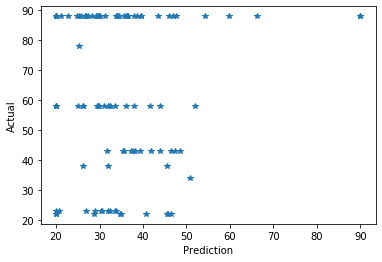

In [53]:
from scipy.stats import pearsonr
print('adjusted r^2 score', r2_score(y_pred, testAgesBPM))
print('r score ', pearsonr(y_pred.reshape(-1), testAgesBPM.reshape(-1)))
print('r^2 score ', pearsonr(y_pred.reshape(-1), testAgesBPM.reshape(-1))[0]**2)
plt.plot(y_pred, testAgesBPM, "*")
plt.xlabel("Prediction")
plt.ylabel("Actual")

adjusted r^2 score -18.742191373326726
r score  (0.03837002123406101, 0.7046761497080702)
r^2 score  0.0014722585295022929


/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0, 0.5, 'Actual')

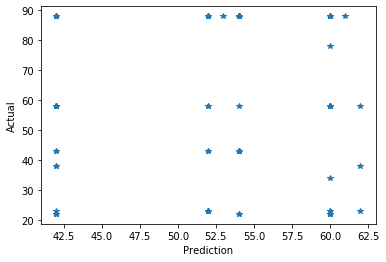

In [54]:
from sklearn.ensemble import RandomForestClassifier as RF
from scipy.stats.stats import pearsonr
rf = RF(n_estimators=10, max_depth=3)
rf.fit(np.nan_to_num(trainDataBPM), trainAgesBPM)
y_pred = rf.predict(testDataBPM)
plt.plot(y_pred, testAges, "*")
print('adjusted r^2 score', r2_score(y_pred, testAgesBPM))
print('r score ', pearsonr(y_pred, testAgesBPM.reshape(-1)))
print('r^2 score ', pearsonr(y_pred, testAgesBPM.reshape(-1))[0]**2)

plt.xlabel("Prediction")
plt.ylabel("Actual")

# Gender

In [77]:
reload(read)
res = read.getGenderAndFileNames("train", "01_tcp_ar")
singGenders = [datum[1] for datum in res]
fn = [datum[0] for datum in res]
genders = []
#associate first token file with each session for now
tokenFiles = []
for i, session_file in enumerate(fn):
    session_dir = path.dirname(session_file)
    session_tkn_files = read.get_token_file_names(session_dir)
    session_tkn_files.sort()
    tokenFiles += (session_tkn_files)
    genders += [singGenders[i] for j in session_tkn_files]


In [86]:

#based on https://www.ers-education.org/lrmedia/2016/pdf/298830.pdf
columns_to_use = ['EEG F4-REF','EEG C4-REF','EEG O2-REF',]
edfRawData = read.EdfDataset("train", "01_tcp_ar", n_process=7, filter=False, columns_to_use=columns_to_use, expand_tse=False)
edfRawData.edf_tokens=tokenFiles
edfABTGData = read.EdfFFTDatasetTransformer(edfRawData, freq_bins=[0,3.5,7.5,14,40], return_ann=False, n_process=7) #gamma, theta, alpha, beta

In [120]:
max_size = 400
data = edfABTGData[:max_size]

Starting 7 processes
retrieving: 0
retrieving: 5
retrieving: 10
retrieving: 15
retrieving: 20
retrieving: 25
retrieving: 30
retrieving: 35
retrieving: 40
retrieving: 45
retrieving: 50
retrieving: 55
retrieving: 60
retrieving: 65
retrieving: 70
retrieving: 75
retrieving: 80
retrieving: 85
retrieving: 90
retrieving: 95
retrieving: 100
retrieving: 105
retrieving: 110
retrieving: 115
retrieving: 120
retrieving: 125
retrieving: 130
retrieving: 135
retrieving: 140
retrieving: 145
retrieving: 150
retrieving: 155
retrieving: 160
retrieving: 165
retrieving: 170
retrieving: 175
retrieving: 180
retrieving: 185
retrieving: 190
retrieving: 195
retrieving: 200
retrieving: 205
retrieving: 210
retrieving: 215
retrieving: 220
retrieving: 225
retrieving: 230
retrieving: 235
retrieving: 240
retrieving: 245
retrieving: 250
retrieving: 255
retrieving: 260
retrieving: 265
retrieving: 270
retrieving: 275
retrieving: 280
retrieving: 285
retrieving: 290
retrieving: 295
retrieving: 300
retrieving: 305
retrievin

In [121]:
allData = np.stack([datum.values.reshape(-1) for datum in data])

In [122]:
numericGenders = np.array([1 if gend=='m' else 0 for gend in genders])
trainSliceG = slice(max_size - 100)
testSliceG = slice(-100, None)
allHandEngineeredData = np.nan_to_num(allData)
trainDataG = (mm.fit_transform(np.stack(allData[trainSliceG])))
testDataG = (mm.transform(np.stack(allData[testSliceG])))
trainGenders = (np.array(numericGenders[trainSliceG]).reshape(-1,1))
testGenders = (np.array(numericGenders[testSliceG]).reshape(-1,1))
trainDataG.shape
testDataG.shape
trainGenders.shape

(300, 1)

In [133]:
lr.fit(testDataG, testGenders)
y_pred = lr.predict(trainDataG[:])
# r2_score(y_pred, testGenders)
from sklearn.metrics import auc, f1_score
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
f1_score(trainGenders, y_pred)
# r2_score(y_pred, trainGenders)

# sum(trainGenders), sum(testGenders), len(trainGenders)

-3.9005681818181808

adjusted r^2 score -1.9206349206349205


/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0, 0.5, 'Actual')

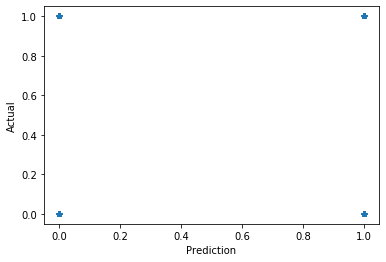

In [134]:
from sklearn.ensemble import RandomForestClassifier as RF
from scipy.stats.stats import pearsonr
rf = RF(n_estimators=10, max_depth=3)
rf.fit(np.nan_to_num(testDataG), testGenders)
y_pred = rf.predict(trainDataG)
plt.plot(y_pred, trainGenders, "*")
print('adjusted r^2 score', r2_score(y_pred, trainGenders))
# print('r score ', pearsonr(y_pred, testAgesBPM.reshape(-1)))
# print('r^2 score ', pearsonr(y_pred, testAgesBPM.reshape(-1))[0]**2)

plt.xlabel("Prediction")
plt.ylabel("Actual")